### **`1. Import libraries and Dataset `**

In [1]:
from src.logger import logging

In [2]:
logging.info('PROJECT FILE 2 STARTS RUNNING!')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [4]:
logging.info('LIBRARIES IMPORTED')

In [5]:
df = pd.read_csv('D:/ccdp/notebook/Credit_Card_2.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
logging.info('DATA IMPORTED AND EXTRACTED TO DATAFRAME!')

## **`2. Feature Engineering`**

In [7]:
logging.info('FEATURE ENGINEERING STARTS!')

In [8]:
df = df.drop('ID', axis=1)

### **`2.1 Handling the imbalance of data using SMOTE`**

In [9]:
logging.info('HANDLING IMBALANCED DATA STARTS!')

In [10]:
# Initialise SMOTE object
smote = SMOTE()

In [11]:
# Separate independent and dependent variables
X = df.iloc[:,:-1]
y = df['default']

In [12]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [13]:
# Combine balanced X and y
df_final = pd.DataFrame(x_smote, columns=df.columns[:-1])
df_final['default'] = y_smote

df_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


C:\Users\sonip\AppData\Local\Temp\ipykernel_25520\3250957056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=df_final,palette = "viridis")


<Axes: xlabel='default', ylabel='count'>

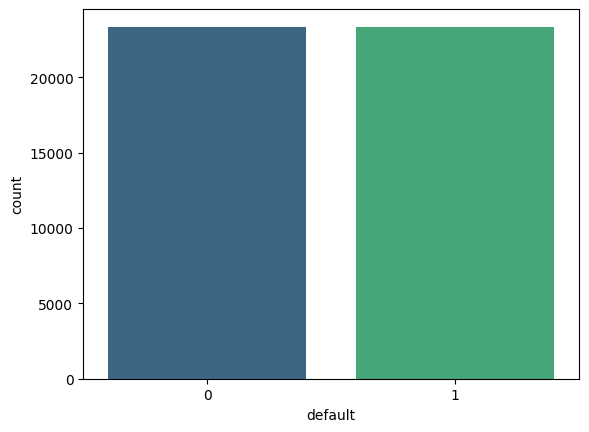

In [14]:
#plot to check if the dataframe is balanced after smote
sns.countplot(x='default', data=df_final,palette = "viridis")

In [15]:
df_final.default.value_counts()

default
1    23364
0    23364
Name: count, dtype: int64

In [16]:
logging.info("HANDLING imbalance DATA ENDS!")

Next, we need to perform One Hot Encoding on the categorical variables. But before that, we need to work on the following points:

* Change column names PAY_1 to PAY_6 as PAY_SEPT, PAY_AUG, PAY_JULY, PAY_JUNE, PAY_MAY AND PAY_SEPT.
* Change column names PAY_AMT1 to PAY_AMT6 to PAY_AMT_SEPT, PAY_AMT_AUG, PAY_AMT_JULY, PAY_AMT_JUNE, PAY_AMT_MAY AND PAY_AMT_SEPT.
* Change column names BILL_AMT1 to BILL_AMT6 to BILL_AMT_SEPT, BILL_AMT_AUG, BILL_AMT_JULY, BILL_AMT_JUNE, BILL_AMT_MAY AND BILL_AMT_SEPT.

* Change values in SEX:
    1. Male and
    2. Female

* Change values in EDUCATION :
    1. Graguation
    2. University
    3. High School
    0,4,5,6. Others

* Change values in Marriage:
    1. Married
    2. Single
    0,3. Others

In [17]:
# Replace values in SEX, MARRIAGE and EDUCATION variables
df_final['SEX'] = df_final['SEX'].replace({1:'Male', 2:'Female'})
df_final['EDUCATION'] = df_final['EDUCATION'].replace({1:'Graduation', 2:'University', 3:'High_School', 0:'Others', 4:'Others', 5:'Others', 6:'Others'})
df_final['MARRIAGE'] = df_final['MARRIAGE'].replace({1:'Married', 2:'Single', 0:'Others', 3:'Others'})
df_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,Female,University,Married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,University,Single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,University,Single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,University,Married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [18]:
# Change column names PAY_1 to PAY_6
df_final.rename(columns={'PAY_1':'PAY_SEPT', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JULY', 
                    'PAY_4':'PAY_JUNE', 'PAY_5':'PAY_MAY', 'PAY_6':'PAY_APRIL'}, inplace=True)

# Change column names PAY_AMT_1 to PAY_AMT_6
df_final.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JULY', 
                    'PAY_AMT4':'PAY_AMT_JUNE', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APRIL'}, inplace=True)

# Change column names BILL_AMT_1 to BILL_AMT_6
df_final.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JULY', 
                    'BILL_AMT4':'BILL_AMT_JUNE', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APRIL'}, inplace=True)

df_final.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default
0,20000.0,Female,University,Married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,University,Single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,University,Single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,University,Married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### **`2.2 Encoding categorical variables`**

In [19]:
logging.info('ENCODING CATEGORICAL VARIABLE STARTS!')

In [20]:
# Convert categorical variables into numerical representations using one-hot encoding
df_final = pd.get_dummies(df_final,columns=['SEX', 'EDUCATION','MARRIAGE'], drop_first=True)

df_final.head()

,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,PAY_APRIL,BILL_AMT_SEPT,BILL_AMT_AUG,...,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default,SEX_Male,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Others,MARRIAGE_Single
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0.0,0.0,0.0,1,False,False,False,True,False,False
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,1000.0,0.0,2000.0,1,False,False,False,True,False,True
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,1000.0,1000.0,5000.0,0,False,False,False,True,False,True
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,1100.0,1069.0,1000.0,0,False,False,False,True,False,False
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,9000.0,689.0,679.0,0,True,False,False,True,False,False


In [21]:
df_final.shape

(46728, 27)

In [22]:
logging.info('ENCODING CATEGORICAL VARIABLE ENDS!')

## `preprocessing.pkl`

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define numerical and categorical features
numerical_columns = ["LIMIT_BAL", "AGE", "PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
                                "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
                                "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

categorical_columns = ["SEX", "EDUCATION", "MARRIAGE"]

# Define the custom ranking for each ordinal variable
education_categories =['Graduation','University','High_School','Others']
marriage_categories = ['Married', 'Single', 'Others']

# Create transformers for numerical and categorical features
num_pipeline = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler(with_mean=False))
            ]
        )

cat_pipeline = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("onehotencoder", OneHotEncoder(drop='first')),
                ("scaler",StandardScaler(with_mean=False))])
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_columns),
        ('cat', cat_pipeline, categorical_columns)
    ])

# Save the preprocessing pipeline to a pickle file
with open('preprocessor1.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)


print(f"Education Categories: {education_categories}")
print(f"Marriage Categories: {marriage_categories}")

Education Categories: ['Graduation', 'University', 'High_School', 'Others']
Marriage Categories: ['Married', 'Single', 'Others']


# **`3. Model-1 : Basic Model with all features`**

In [25]:
logging.info('MODEL RUNNING!')

In [26]:
# Scale the numerical features to a common range to avoid any bias towards features with larger magnitudes.
scaler = StandardScaler()
numerical_features = ['LIMIT_BAL', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL',
                        'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL',
                        'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL']
df_final[numerical_features] = scaler.fit_transform(df_final[numerical_features])

In [27]:
from sklearn.model_selection import train_test_split

X = df_final.drop('default', axis=1)
y = df_final['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **`Model Started`**

In [28]:
logging.info('MODEL RUNNING!')

C:\Users\sonip\AppData\Local\Temp\ipykernel_25520\4054953587.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Feature'], y=feature_importance_df['Importance'], palette='viridis')


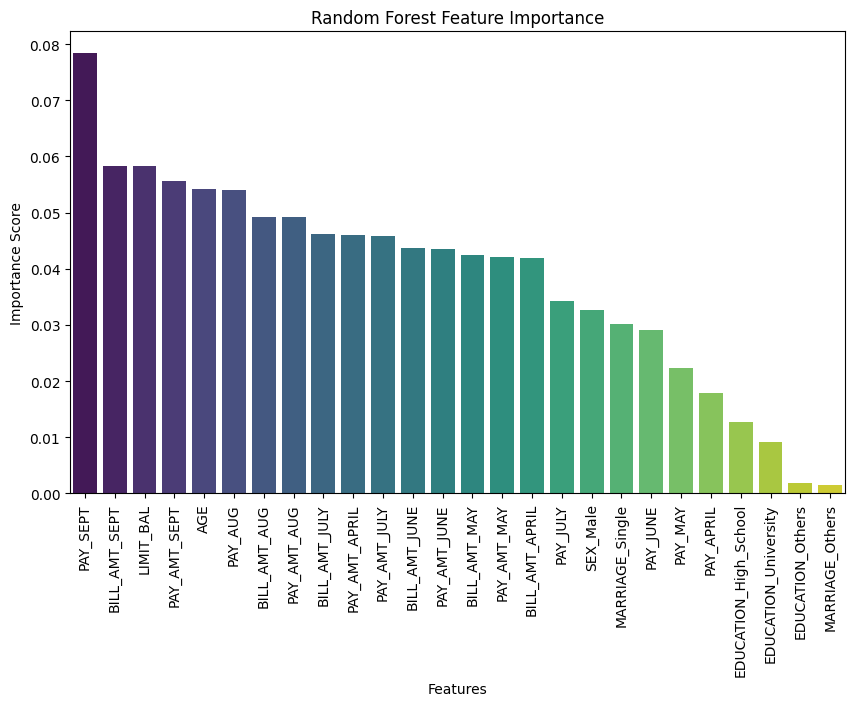

In [29]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Split the data into X_train, X_test, y_train, y_test

# Createed a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Created a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Feature'], y=feature_importance_df['Importance'], palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.show()


In [30]:
feature_importance

array([0.05825134, 0.05412648, 0.07835873, 0.05396968, 0.03419126,
       0.02904146, 0.02229424, 0.01781857, 0.05829105, 0.04925919,
       0.04611521, 0.04364592, 0.04242961, 0.04185455, 0.05553716,
       0.04913602, 0.04585119, 0.04358313, 0.04217023, 0.04602628,
       0.03258648, 0.01277616, 0.0018323 , 0.00920417, 0.00144366,
       0.03020591])

## `Hyperparameter Tuning:`

d:\ccdp\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\ccdp\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\ccdp\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
d:\ccdp\venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
d:\ccdp\venv\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated an


Model: Random Forest
Recall: 0.8157
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      4664
           1       0.84      0.82      0.83      4682

    accuracy                           0.83      9346
   macro avg       0.83      0.83      0.83      9346
weighted avg       0.83      0.83      0.83      9346

Confusion Matrix:
[[3963  701]
 [ 863 3819]]

Model: XGBoost
Recall: 0.7666
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      4664
           1       0.83      0.77      0.80      4682

    accuracy                           0.80      9346
   macro avg       0.80      0.80      0.80      9346
weighted avg       0.80      0.80      0.80      9346

Confusion Matrix:
[[3915  749]
 [1093 3589]]

Model: Logistic Regression
Recall: 0.7100
Classification Report:
              precision    recall  f1-score   support

           0       0.

d:\ccdp\venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
d:\ccdp\venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
d:\ccdp\venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
d:\ccdp\venv\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


Recall: 0.7441
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      4664
           1       0.79      0.74      0.76      4682

    accuracy                           0.77      9346
   macro avg       0.77      0.77      0.77      9346
weighted avg       0.77      0.77      0.77      9346

Confusion Matrix:
[[3719  945]
 [1198 3484]]


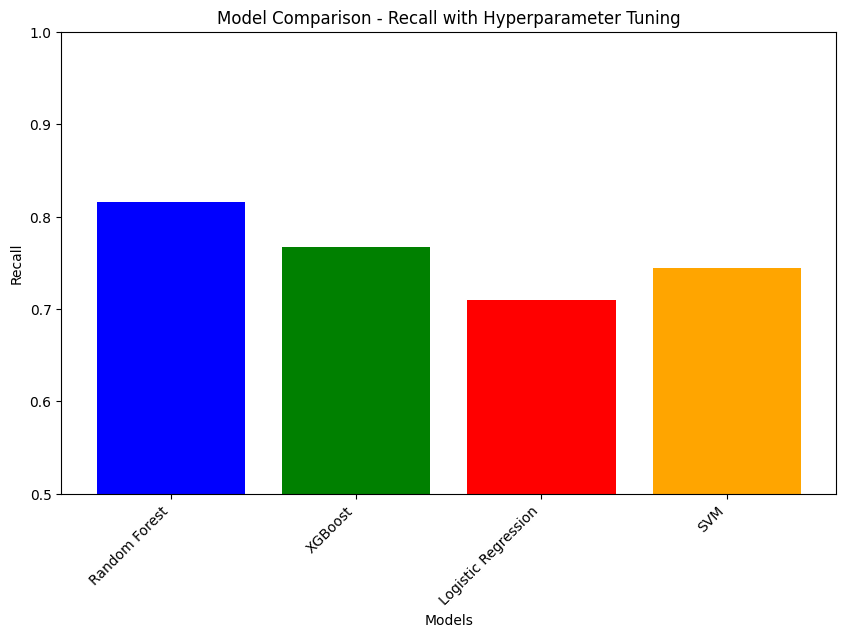

In [31]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from joblib import parallel_backend

from sklearn.metrics import recall_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grids for each model
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

param_grid_logistic = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}


# Create the models with default hyperparameters
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
logistic_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)


# Perform Randomized Search with cross-validation to find the best hyperparameters for each model
random_search_rf = RandomizedSearchCV(rf_model, param_grid_rf, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_xgb = RandomizedSearchCV(xgb_model, param_grid_xgb, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_logistic = RandomizedSearchCV(logistic_model, param_grid_logistic, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_svm = RandomizedSearchCV(svm_model, param_grid_svm, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the models with Randomized Search
with parallel_backend('threading'):
    random_search_rf.fit(X_train, y_train)
    random_search_xgb.fit(X_train, y_train)
    random_search_logistic.fit(X_train, y_train)
    random_search_svm.fit(X_train, y_train)
    

# Get the best hyperparameters and best models
best_params_rf = random_search_rf.best_params_
best_rf_model = random_search_rf.best_estimator_

best_params_xgb = random_search_xgb.best_params_
best_xgb_model = random_search_xgb.best_estimator_

best_params_logistic = random_search_logistic.best_params_
best_logistic_model = random_search_logistic.best_estimator_

best_params_svm = random_search_svm.best_params_
best_svm_model = random_search_svm.best_estimator_

# Evaluate the best models
best_models = {
    "Random Forest": best_rf_model,
    "XGBoost": best_xgb_model,
    "Logistic Regression": best_logistic_model,
    "SVM": best_svm_model,
}

# Calculate recalls
model_recalls = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    model_recalls[model_name] = recall

# Print the best hyperparameters for each model
# (Include your existing print statements for best hyperparameters here)

# Evaluate the best models
for model_name, model in best_models.items():
    print(f"\nModel: {model_name}")
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)  # Changed accuracy_score to recall_score
    print(f"Recall: {recall:.4f}")  # Changed from Accuracy to Recall

    # Additional Evaluation Metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Plotting the bar graph
plt.figure(figsize=(10, 6))

# Add color to the bars
colors = ['blue', 'green', 'red','orange'] 

plt.bar(model_recalls.keys(), model_recalls.values(), color=colors)

plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Model Comparison - Recall with Hyperparameter Tuning')
plt.ylim(0.5, 1.0)  # Adjust the y-axis limits as needed
plt.xticks(rotation=45, ha='right')
plt.show()

# **`10. Save the Model`**

In [32]:
logging.info('SAVING THE MODEL....')

In [33]:
logging.info('PROJECT RUNNING ENDS!')